In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
players_dataset = pd.read_csv('../datasets/t20_international_played_foreign_players_updated.csv')
ipl_dataset = pd.read_csv('../datasets/international_played_foreign_players_ipl_matches_details.csv')

In [15]:
ipl_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8569 entries, 0 to 8568
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Bat1        8569 non-null   object        
 1   Wkts        8569 non-null   object        
 2   Conc        8569 non-null   object        
 3   Ct          8569 non-null   object        
 4   St          8569 non-null   object        
 5   Opposition  8569 non-null   object        
 6   Ground      8569 non-null   object        
 7   Start Date  8569 non-null   datetime64[ns]
 8   match_link  8569 non-null   object        
 9   player_id   8569 non-null   int64         
 10  IPL Season  8569 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 703.1+ KB


In [13]:
ipl_dataset['Start Date'] = pd.to_datetime(ipl_dataset['Start Date'], format="%d-%b-%y", errors='coerce')

In [14]:
# Create a new column 'IPL Season' by extracting the year from 'Start Date'
ipl_dataset['IPL Season'] = ipl_dataset['Start Date'].dt.year

    Season  Player Count
0     2008            65
1     2009            60
2     2010            68
3     2011            71
4     2012            68
5     2013            72
6     2014            58
7     2015            56
8     2016            63
9     2017            60
10    2018            58
11    2019            60
12    2020            55
13    2021            66
14    2022            67
15    2023            72
16    2024            72


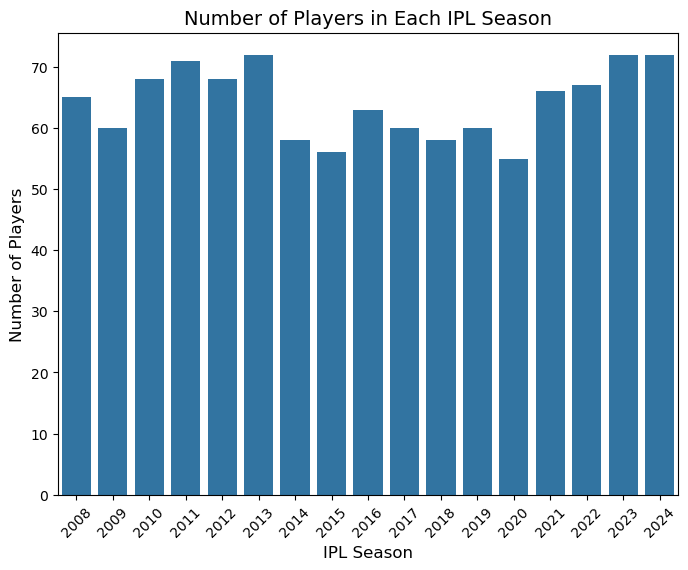

In [35]:
# Group by 'IPL Season' and count foreign players per ipl season
players_per_season = ipl_dataset.groupby('IPL Season')['player_id'].nunique()

# Convert Series to DataFrame for visualization
players_per_season_df = players_per_season.reset_index()
players_per_season_df.columns = ['Season', 'Player Count']
print(players_per_season_df)

plt.figure(figsize=(8, 6))
sns.barplot(data=players_per_season_df, x='Season', y='Player Count',color='#1f77b4')
plt.title('Number of Players in Each IPL Season', fontsize=14)
plt.xlabel('IPL Season', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.xticks(rotation=45)
plt.show()